In [1]:
#Importing all the required libraries
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [121]:
df=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
df

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13
0,3,1,3,4,3,4,4,3,4,4,1,4,2
1,2,1,1,2,5,6,5,2,2,3,2,1,2
2,1,2,1,2,3,5,6,1,3,2,4,2,2
3,1,1,1,1,2,2,2,2,4,2,1,1,1
4,1,2,1,2,7,6,5,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,6,7,6,7,4,4,4,6,4,4,6,6,6
106,6,4,7,7,4,4,6,6,5,4,6,7,7
107,7,6,4,4,4,2,2,7,6,4,2,4,4
108,7,7,7,7,4,4,4,6,6,4,6,7,7


In [78]:
# aa=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0
# df = pd.concat([df, aa], ignore_index=True)


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  1.0
3  :  2.3741027013091993
4  :  2.296241989148198
5  :  2.9249881291307074
6  :  2.6967994498529686
7  :  3.411211461689767
8  :  3.0822070014844885
9  :  2.751622897751175


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


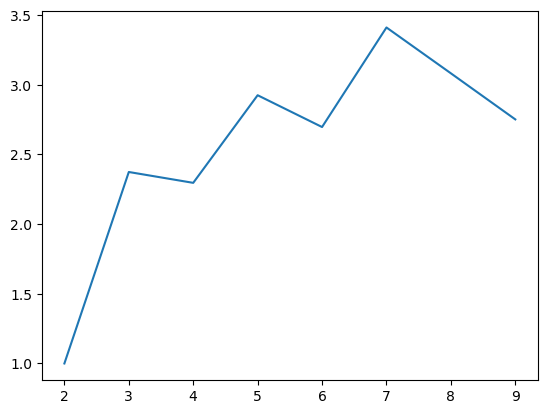

In [123]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Function to compute pairwise distances between points in different clusters
def inter_cluster_distances(X, labels):
    n_clusters = len(np.unique(labels))
    cluster_distances = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            mask_i = labels == i
            mask_j = labels == j
            cluster_distances[i, j] = np.min(pairwise_distances(X[mask_i], X[mask_j]))
            cluster_distances[j, i] = cluster_distances[i, j]
    return cluster_distances

# Function to compute Dunn's index
def dunn_index(X, labels):
    cluster_distances = inter_cluster_distances(X, labels)
    min_intra_cluster_distances = np.min(np.ma.masked_where(cluster_distances == 0, cluster_distances), axis=1)
    max_inter_cluster_distance = np.max(cluster_distances)
    return max_inter_cluster_distance / np.max(min_intra_cluster_distances)

k_range = range(2, 10)
dunn_values = []

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute Dunn's index
    dunn_values.append(dunn_index(df, labels))
    
for i in range(len(dunn_values)):
    print((i + 2), " : ", dunn_values[i])

plt.plot(k_range, dunn_values)


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

2  :  0.3716384275497875
3  :  0.2576073909991531
4  :  0.2464212500515398
5  :  0.18529398430950741
6  :  0.19652702813107878
7  :  0.1761328009439879
8  :  0.1471081542558503
9  :  0.1369735265025545
10  :  0.15287366456905987
11  :  0.15235949187328873
12  :  0.14807369700886472
13  :  0.15384045267434304
14  :  0.14911707672175586


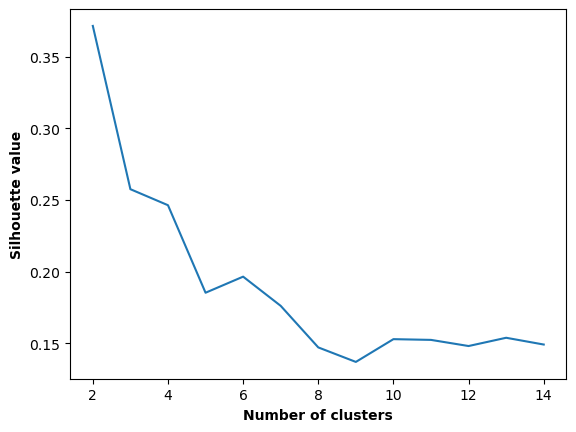

In [124]:
#Validating the number of clusters using silhouette index

k_range = range(2, 15)
silhouette_values=[]

for k in k_range:
    # Create k-means object and fit to data
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=30)
    kmeans.fit(df)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_values.append(silhouette_score(df, labels))
    
for i in range(len(silhouette_values)):
    print((i+2)," : ",silhouette_values[i])
plt.plot(k_range,silhouette_values)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.xlabel("Number of clusters",fontweight='bold',fontsize=10)
plt.ylabel("Silhouette value",fontweight='bold',fontsize=10)
# plt.title("Silhouette values for SSTA data",fontweight='bold',fontsize=12)
plt.savefig("Silhouette values for SSTA data.png")

In [125]:
km = KMeans(n_clusters=8,random_state=42,n_init=30)
km.fit(df)

values=km.labels_
vals=[i for i in values]

cnt=[0 for i in range(8)]
for i in range(len(vals)):
    cnt[vals[i]]+=1
print("Number of years in each cluster\n",cnt)

Number of years in each cluster
 [19, 16, 16, 18, 11, 9, 12, 9]


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [126]:
vals

[3,
 3,
 3,
 7,
 3,
 3,
 0,
 7,
 7,
 7,
 7,
 3,
 7,
 3,
 1,
 0,
 7,
 7,
 1,
 5,
 0,
 3,
 3,
 3,
 0,
 5,
 0,
 3,
 7,
 3,
 1,
 3,
 0,
 0,
 0,
 3,
 4,
 0,
 3,
 1,
 6,
 1,
 0,
 5,
 4,
 1,
 5,
 3,
 0,
 0,
 3,
 4,
 1,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 4,
 5,
 5,
 1,
 3,
 1,
 5,
 0,
 6,
 6,
 0,
 5,
 2,
 0,
 0,
 0,
 1,
 1,
 6,
 6,
 1,
 6,
 6,
 4,
 4,
 5,
 6,
 2,
 4,
 2,
 2,
 6,
 6,
 6,
 2,
 2,
 6,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2]

In [127]:
df = pd.DataFrame(vals, columns=(['Cluster Number']))
# df.to_csv('SSTA 8 Cluster Number 1901-2010.csv')
df

,Cluster Number
0,3
1,3
2,3
3,7
4,3
...,...
105,2
106,2
107,4
108,2


In [128]:
# labels = kmeans.labels_
# labels
km.inertia_

1326.5848285486443

In [129]:
years_Cluster={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
}

years_Cluster_not_indexs={
    0:[],
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[],
    7:[],
    
}

yr=1901
indx=0
for i in range(len(values)):
    years_Cluster[values[i]].append(indx)
    years_Cluster_not_indexs[values[i]].append(yr)
    indx+=1
    yr+=1

years_Cluster_not_indexs

{0: [1907,
  1916,
  1921,
  1925,
  1927,
  1933,
  1934,
  1935,
  1938,
  1943,
  1949,
  1950,
  1955,
  1956,
  1968,
  1971,
  1974,
  1975,
  1976],
 1: [1915,
  1919,
  1931,
  1940,
  1942,
  1946,
  1953,
  1957,
  1958,
  1959,
  1960,
  1964,
  1966,
  1977,
  1978,
  1981],
 2: [1973,
  1988,
  1990,
  1991,
  1995,
  1996,
  1998,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2009,
  2010],
 3: [1901,
  1902,
  1903,
  1905,
  1906,
  1912,
  1914,
  1922,
  1923,
  1924,
  1928,
  1930,
  1932,
  1936,
  1939,
  1948,
  1951,
  1965],
 4: [1937, 1945, 1952, 1954, 1961, 1984, 1985, 1989, 1999, 2000, 2008],
 5: [1920, 1926, 1944, 1947, 1962, 1963, 1967, 1972, 1986],
 6: [1941, 1969, 1970, 1979, 1980, 1982, 1983, 1987, 1992, 1993, 1994, 1997],
 7: [1904, 1908, 1909, 1910, 1911, 1913, 1917, 1918, 1929]}

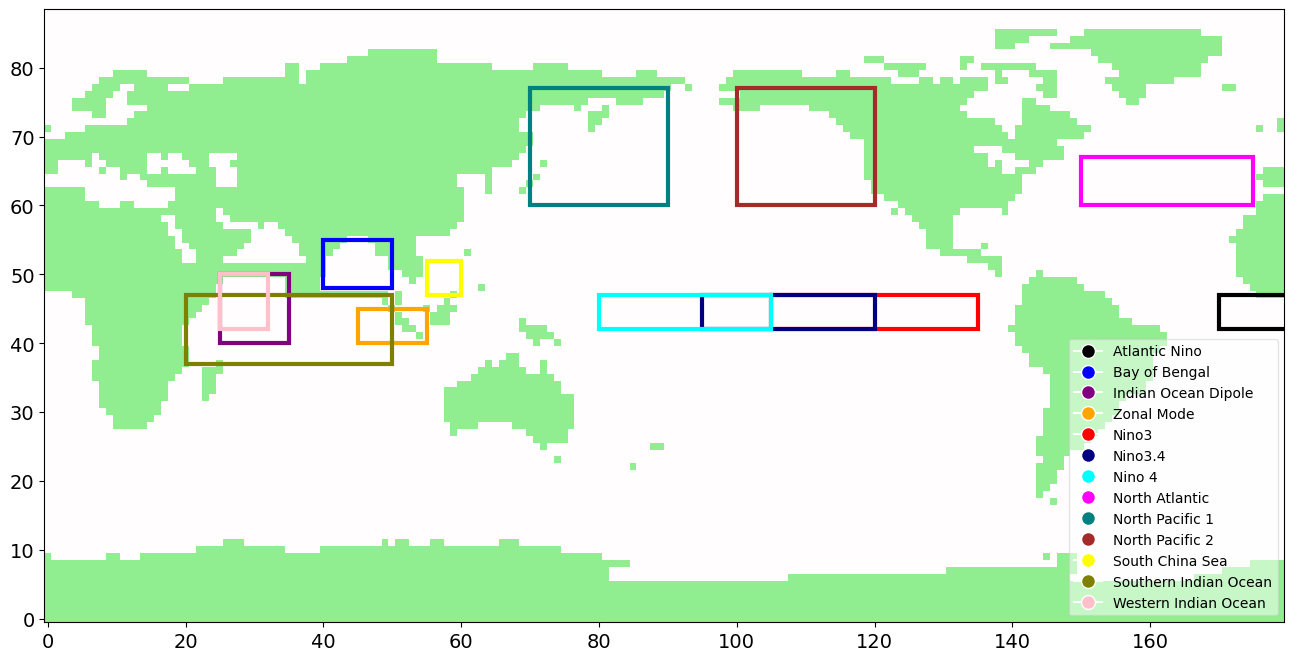

In [130]:
PlotSSTMap(sst_cluster1_fullMap.to_array()[0],cluster=1)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

def PlotSSTMap(data, cluster=None):
    
    # Replace non-null values with null and null values with 100
    data = np.where(np.isnan(data), np.nan, -0)

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Create a colormap
#     cmap = plt.get_cmap('White')  # You can choose any other colormap you prefer
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer
    cmap.set_bad(color="lightgreen", alpha=1.0)


    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Indian Ocean Dipole': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Zonal Mode': [[90//2, 110//2],[-10//2+45,0//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-15//2+45, 5//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    }

    colors = ["black","blue","purple","orange","red","navy","cyan","magenta","teal","brown","yellow","olive","pink"]
    
    i = 0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=3, edgecolor=colors[i], facecolor='None', label=name)
        ax.add_patch(rect)
        i += 1

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Add colorbar
#     cbar = plt.colorbar(im, ax=ax, label='Temperature')
    # cbar = plt.colorbar(im, ax=ax)

    # Set axis labels
    # ax.set_xlabel('Longitude')
    # ax.set_ylabel('Latitude')
#     ax.set_title(f'Cluster {cluster}', fontweight='bold', fontsize=20)

    # Add legends outside of the map
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=name)
                       for i, (name, coords) in enumerate(regions.items())]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=10,framealpha=0.5)

#     plt.savefig(f'SSTA 8 Clusters {cluster} SSTA Map.png', dpi=100, bbox_inches='tight')
    plt.show()

# Example usage:
# PlotSSTMap(your_data, cluster_number)


In [132]:
def PlotAllMap(data,rainfall,cluster=None):
    
    # Create a figure and axis for the plot
    fig, axes = plt.subplots(2,8,figsize=(100,15))
    
    # Create a colormap
    cmap = plt.get_cmap('seismic')  # You can choose any other colormap you prefer
    cmap.set_bad(color="lightgreen")

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0 # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Indian Ocean Dipole': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Zonal Mode': [[90//2, 110//2],[-10//2+45,0//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-15//2+45, 5//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    }

    colors = ["black","blue","purple","orange","red","navy","cyan","magenta","teal","brown","yellow","olive","pink"]
    
    
    cluster=1
    
    for i, ax in enumerate(axes.ravel()):
        
        if(i<8):
            j=0
            for name, coords in regions.items():
                x1, x2 = coords[0]
                y1, y2 = coords[1]
                rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor=colors[j],facecolor='None')
                ax.add_patch(rect)
                j+=1

            # Plot the average yearly rainfall data using the colormap
            im = ax.imshow(data[i].to_array()[0], cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, label='Temperature')
        else:
            im = ax.imshow(rainfall[i-8], cmap='BrBG', vmin=vmin, vmax=vmax, origin='lower',
                   extent=[rainfall[i-8]['lon'].min(), rainfall[i-8]['lon'].max(),
                           rainfall[i-8]['lat'].min(), rainfall[i-8]['lat'].max()])


            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, label='Rainfall')
        
        # Set axis labels
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'Cluster {cluster}')
        cluster+=1
        
        if(cluster>8):
            cluster=1
            

    #plt.savefig(f'SSTA 8 Clusters.png')


In [133]:
def PlotRainFallMap(data,cluster=None):
    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a colormap
    cmap = plt.get_cmap('BrBG')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = -1.0  # Minimum value for the color scale
    vmax = 1.0  # Maximum value for the color scale

    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower',
                   extent=[data['lon'].min(), data['lon'].max(),
                           data['lat'].min(), data['lat'].max()])
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

#     if(cluster==8):
#         # Add colorbar
#     cbar = plt.colorbar(im, ax=ax, label='Rainfall')
#     cbar = plt.colorbar(im, ax=ax)
    
   
    # Set axis labels
#     ax.set_xlabel('Longitude')
#     ax.set_ylabel('Latitude')
    ax.set_title(f'Cluster {cluster}',fontweight='bold',fontsize=20)
    
#     plt.savefig(f'SSTA 8 Clusters {cluster} INDIAN RAINFALL.png', dpi=100, bbox_inches='tight')


In [135]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]
region13=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]
path13=[]


#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")
    path13.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\No 12 Regions\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))
    region13.append(xarray.open_dataset(path13[i]))

    

In [136]:
#Accessing the zone files
zone1=[]
zone2=[]
zone3=[]
zone4=[]
zone5=[]
zone6=[]
zone7=[]
zone8=[]

#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]

#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 1\Zone1_Anomaly_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 2\Zone2_Anomaly_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 3\Zone3_Anomaly_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 4\Zone4_Anomaly_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 5\Zone5_Anomaly_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 6\Zone6_Anomaly_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 7\Zone7_Anomaly_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\IMD Anomaly Zonal Data\Zone 8\Zone8_Anomaly_{i}.nc")

    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    zone1.append(xarray.open_dataset(path1[i]))
    zone2.append(xarray.open_dataset(path2[i]))
    zone3.append(xarray.open_dataset(path3[i]))
    zone4.append(xarray.open_dataset(path4[i]))
    zone5.append(xarray.open_dataset(path5[i]))
    zone6.append(xarray.open_dataset(path6[i]))
    zone7.append(xarray.open_dataset(path7[i]))
    zone8.append(xarray.open_dataset(path8[i]))


In [137]:
def getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,
                      region7,region8,region9,region10,region11,region12,
                      region13,cluster_years):
    
    cluster_region1=[]
    cluster_region2=[]
    cluster_region3=[]
    cluster_region4=[]
    cluster_region5=[]
    cluster_region6=[]
    cluster_region7=[]
    cluster_region8=[]
    cluster_region9=[]
    cluster_region10=[]
    cluster_region11=[]
    cluster_region12=[]
    cluster_region13=[]

    
    for i in cluster_years:
        cluster_region1.append(region1[i])
        cluster_region2.append(region2[i])
        cluster_region3.append(region3[i])
        cluster_region4.append(region4[i])
        cluster_region5.append(region5[i])
        cluster_region6.append(region6[i])
        cluster_region7.append(region7[i])
        cluster_region8.append(region8[i])
        cluster_region9.append(region9[i])
        cluster_region10.append(region10[i])
        cluster_region11.append(region11[i])
        cluster_region12.append(region12[i])
        cluster_region13.append(region13[i])


    cluster_region1_combined=xarray.concat(cluster_region1,dim='years')
    cluster_region2_combined=xarray.concat(cluster_region2,dim='years')
    cluster_region3_combined=xarray.concat(cluster_region3,dim='years')
    cluster_region4_combined=xarray.concat(cluster_region4,dim='years')
    cluster_region5_combined=xarray.concat(cluster_region5,dim='years')
    cluster_region6_combined=xarray.concat(cluster_region6,dim='years')
    cluster_region7_combined=xarray.concat(cluster_region7,dim='years')
    cluster_region8_combined=xarray.concat(cluster_region8,dim='years')
    cluster_region9_combined=xarray.concat(cluster_region9,dim='years')
    cluster_region10_combined=xarray.concat(cluster_region10,dim='years')
    cluster_region11_combined=xarray.concat(cluster_region11,dim='years')
    cluster_region12_combined=xarray.concat(cluster_region12,dim='years')
    cluster_region13_combined=xarray.concat(cluster_region13,dim='years')


    cluster_region1_mean=cluster_region1_combined.mean(dim='years')
    cluster_region2_mean=cluster_region2_combined.mean(dim='years')
    cluster_region3_mean=cluster_region3_combined.mean(dim='years')
    cluster_region4_mean=cluster_region4_combined.mean(dim='years')
    cluster_region5_mean=cluster_region5_combined.mean(dim='years')
    cluster_region6_mean=cluster_region6_combined.mean(dim='years')
    cluster_region7_mean=cluster_region7_combined.mean(dim='years')
    cluster_region8_mean=cluster_region8_combined.mean(dim='years')
    cluster_region9_mean=cluster_region9_combined.mean(dim='years')
    cluster_region10_mean=cluster_region10_combined.mean(dim='years')
    cluster_region11_mean=cluster_region11_combined.mean(dim='years')
    cluster_region12_mean=cluster_region12_combined.mean(dim='years')
    cluster_region13_mean=cluster_region13_combined.mean(dim='years')


    cluster_fullMap=cluster_region1_mean.combine_first(cluster_region2_mean.combine_first(cluster_region3_mean.combine_first(
                    cluster_region4_mean.combine_first(cluster_region5_mean.combine_first(cluster_region6_mean.combine_first(
                    cluster_region7_mean.combine_first(cluster_region8_mean.combine_first(cluster_region9_mean.combine_first(
                    cluster_region10_mean.combine_first(cluster_region11_mean.combine_first(cluster_region12_mean.combine_first(
                    cluster_region13_mean))))))))))))
    
    return cluster_fullMap

In [138]:
def getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster_years):
    
    cluster_region1=[]
    cluster_region2=[]
    cluster_region3=[]
    cluster_region4=[]
    cluster_region5=[]
    cluster_region6=[]
    cluster_region7=[]
    cluster_region8=[]
   
    for i in cluster_years:
        cluster_region1.append(zone1[i])
        cluster_region2.append(zone2[i])
        cluster_region3.append(zone3[i])
        cluster_region4.append(zone4[i])
        cluster_region5.append(zone5[i])
        cluster_region6.append(zone6[i])
        cluster_region7.append(zone7[i])
        cluster_region8.append(zone8[i])
        

    cluster_region1_combined=xarray.concat(cluster_region1,dim='years')
    cluster_region2_combined=xarray.concat(cluster_region2,dim='years')
    cluster_region3_combined=xarray.concat(cluster_region3,dim='years')
    cluster_region4_combined=xarray.concat(cluster_region4,dim='years')
    cluster_region5_combined=xarray.concat(cluster_region5,dim='years')
    cluster_region6_combined=xarray.concat(cluster_region6,dim='years')
    cluster_region7_combined=xarray.concat(cluster_region7,dim='years')
    cluster_region8_combined=xarray.concat(cluster_region8,dim='years')
    
    cluster_region1_mean=cluster_region1_combined['rain'].mean(dim='years')
    cluster_region2_mean=cluster_region2_combined['rain'].mean(dim='years')
    cluster_region3_mean=cluster_region3_combined['rain'].mean(dim='years')
    cluster_region4_mean=cluster_region4_combined['rain'].mean(dim='years')
    cluster_region5_mean=cluster_region5_combined['rain'].mean(dim='years')
    cluster_region6_mean=cluster_region6_combined['rain'].mean(dim='years')
    cluster_region7_mean=cluster_region7_combined['rain'].mean(dim='years')
    cluster_region8_mean=cluster_region8_combined['rain'].mean(dim='years')
   


    cluster_fullMap=cluster_region1_mean.combine_first(cluster_region2_mean.combine_first(cluster_region3_mean.combine_first(
                   cluster_region4_mean.combine_first(cluster_region5_mean.combine_first(cluster_region6_mean.combine_first(
                   cluster_region7_mean.combine_first(cluster_region8_mean)))))))
    
    return cluster_fullMap

In [139]:
#Getting the cluster zonal data and meaning them
cluster1_years=years_Cluster[0]
cluster2_years=years_Cluster[1]
cluster3_years=years_Cluster[2]
cluster4_years=years_Cluster[3]
cluster5_years=years_Cluster[4]
cluster6_years=years_Cluster[5]
cluster7_years=years_Cluster[6]
cluster8_years=years_Cluster[7]

sst_cluster1_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster1_years)
sst_cluster2_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster2_years)
sst_cluster3_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster3_years)
sst_cluster4_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster4_years)
sst_cluster5_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster5_years)
sst_cluster6_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster6_years)
sst_cluster7_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster7_years)
sst_cluster8_fullMap=getSSTFullMapCluster(region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13,cluster8_years)


rainfall_cluster1_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster1_years)
rainfall_cluster2_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster2_years)
rainfall_cluster3_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster3_years)
rainfall_cluster4_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster4_years)
rainfall_cluster5_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster5_years)
rainfall_cluster6_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster6_years)
rainfall_cluster7_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster7_years)
rainfall_cluster8_fullMap=getRainfallFullMapCluster(zone1,zone2,zone3,zone4,zone5,zone6,zone7,zone8,cluster8_years)



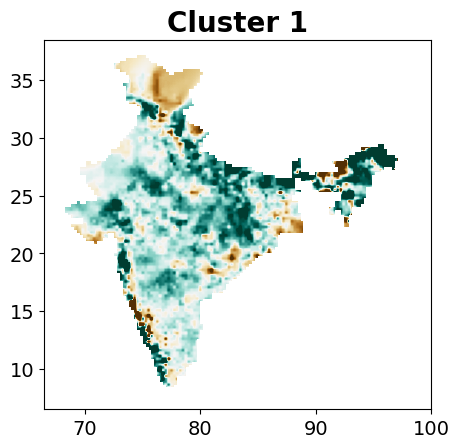

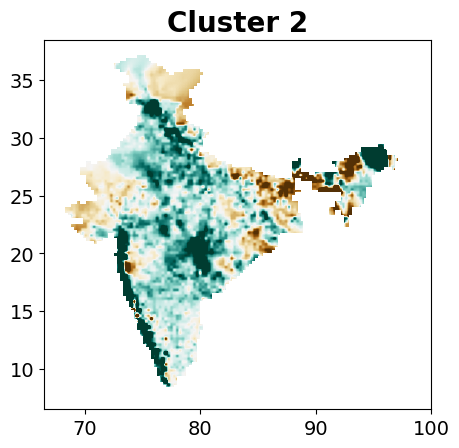

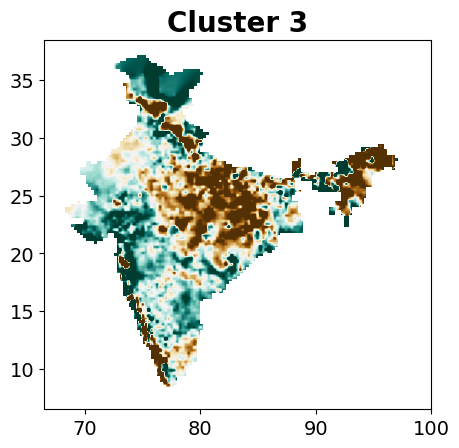

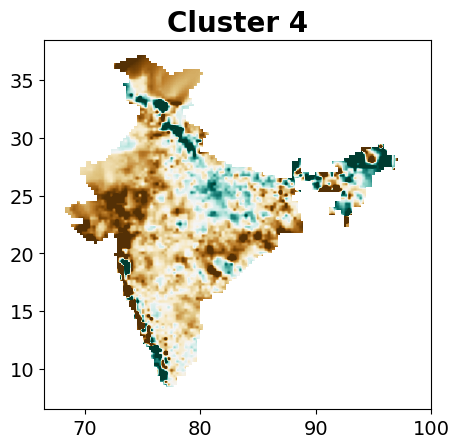

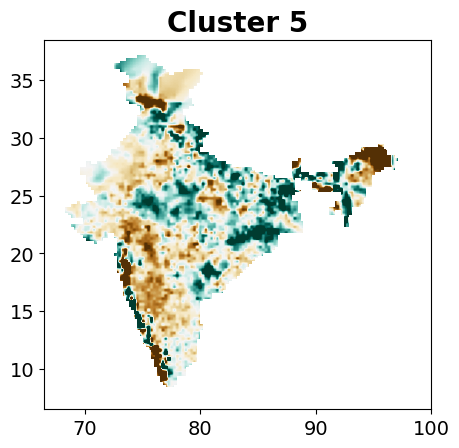

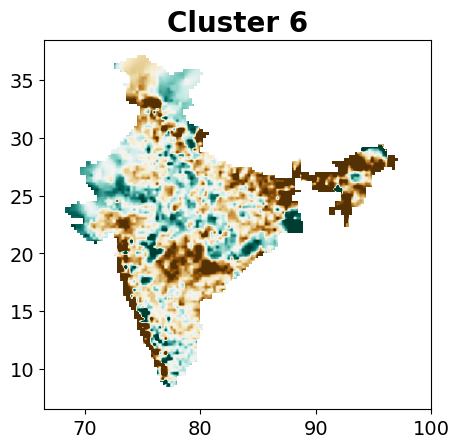

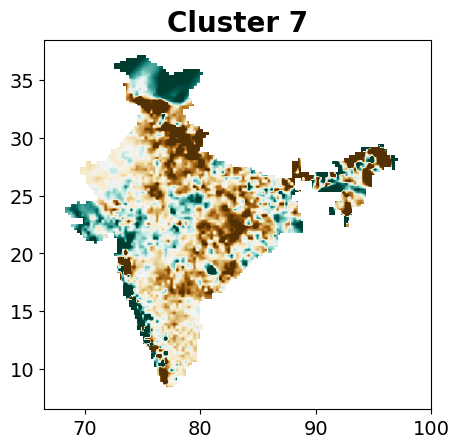

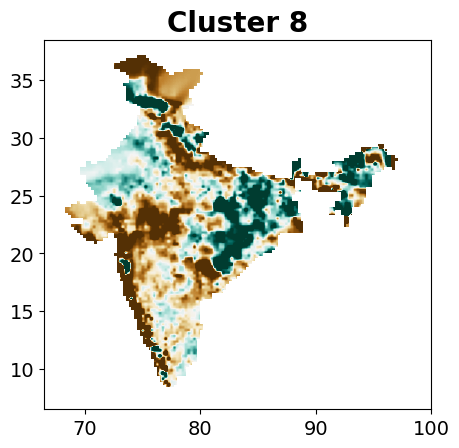

In [140]:
PlotRainFallMap(rainfall_cluster1_fullMap,1)
PlotRainFallMap(rainfall_cluster2_fullMap,2)
PlotRainFallMap(rainfall_cluster3_fullMap,3)
PlotRainFallMap(rainfall_cluster4_fullMap,4)
PlotRainFallMap(rainfall_cluster5_fullMap,5)
PlotRainFallMap(rainfall_cluster6_fullMap,6)
PlotRainFallMap(rainfall_cluster7_fullMap,7)
PlotRainFallMap(rainfall_cluster8_fullMap,8)


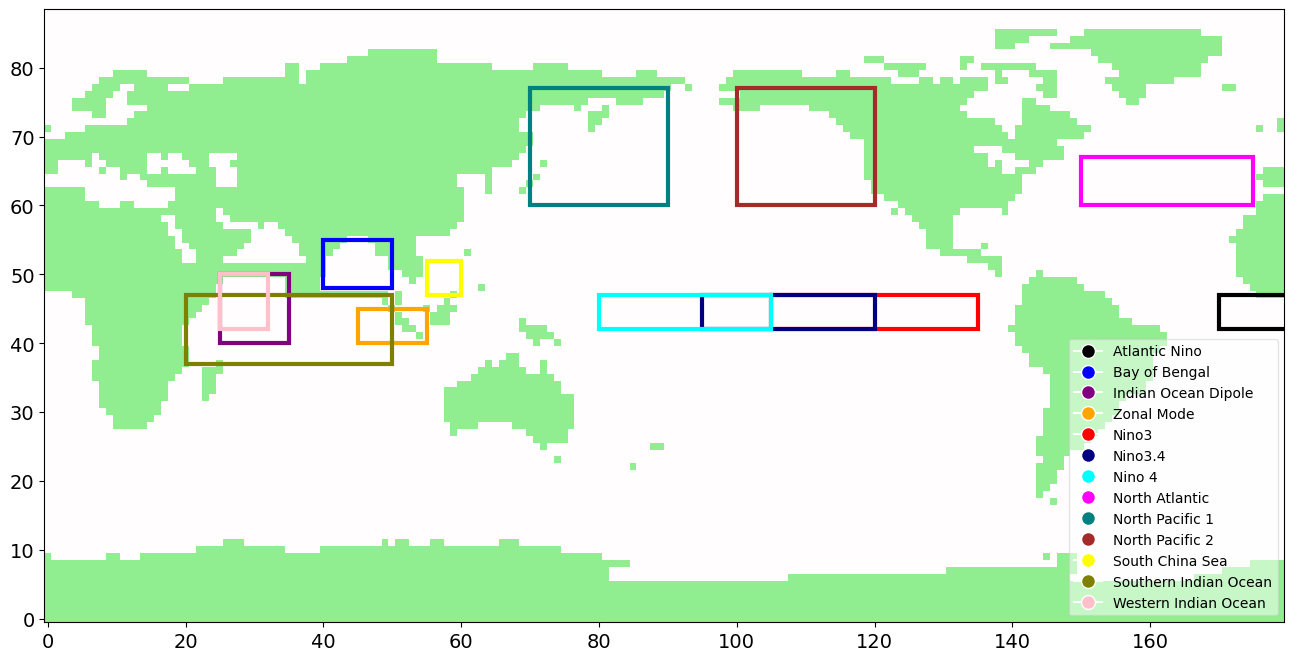

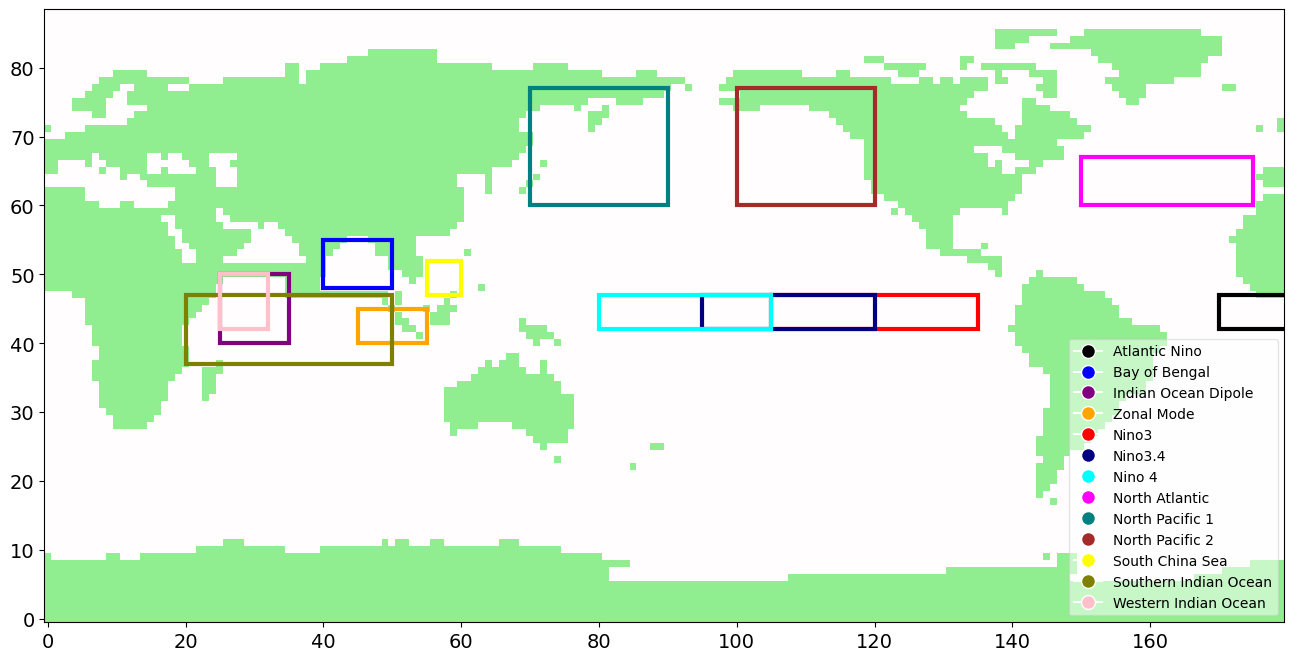

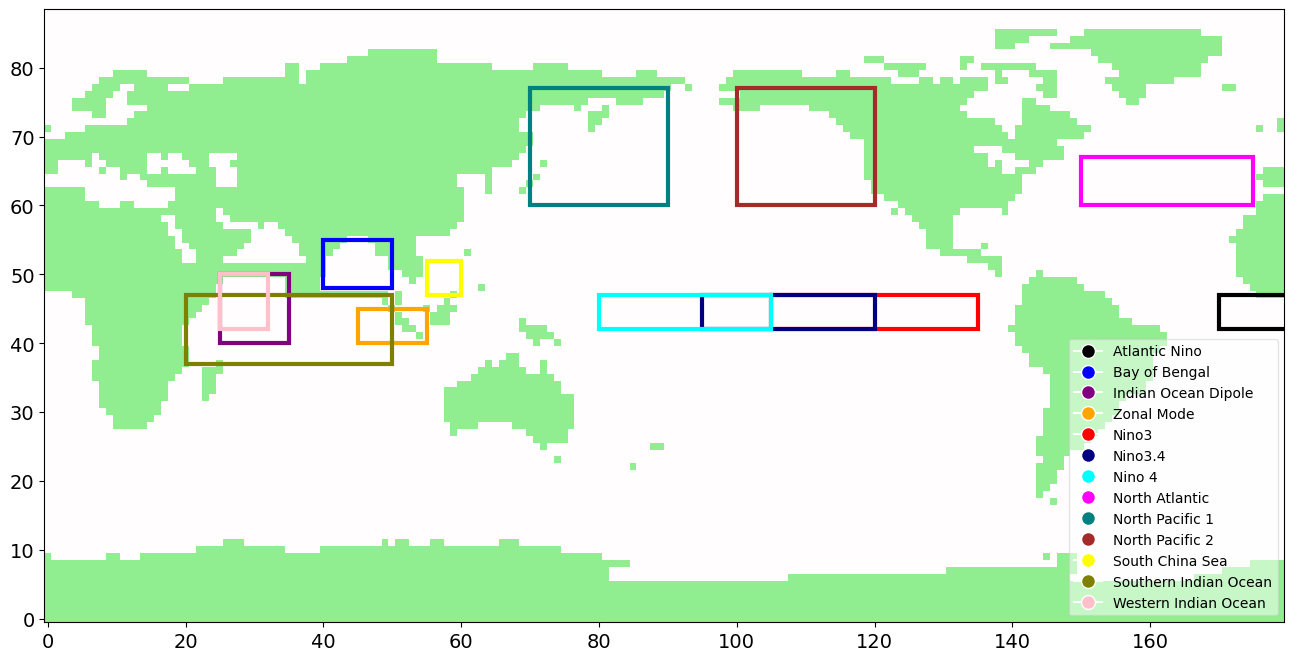

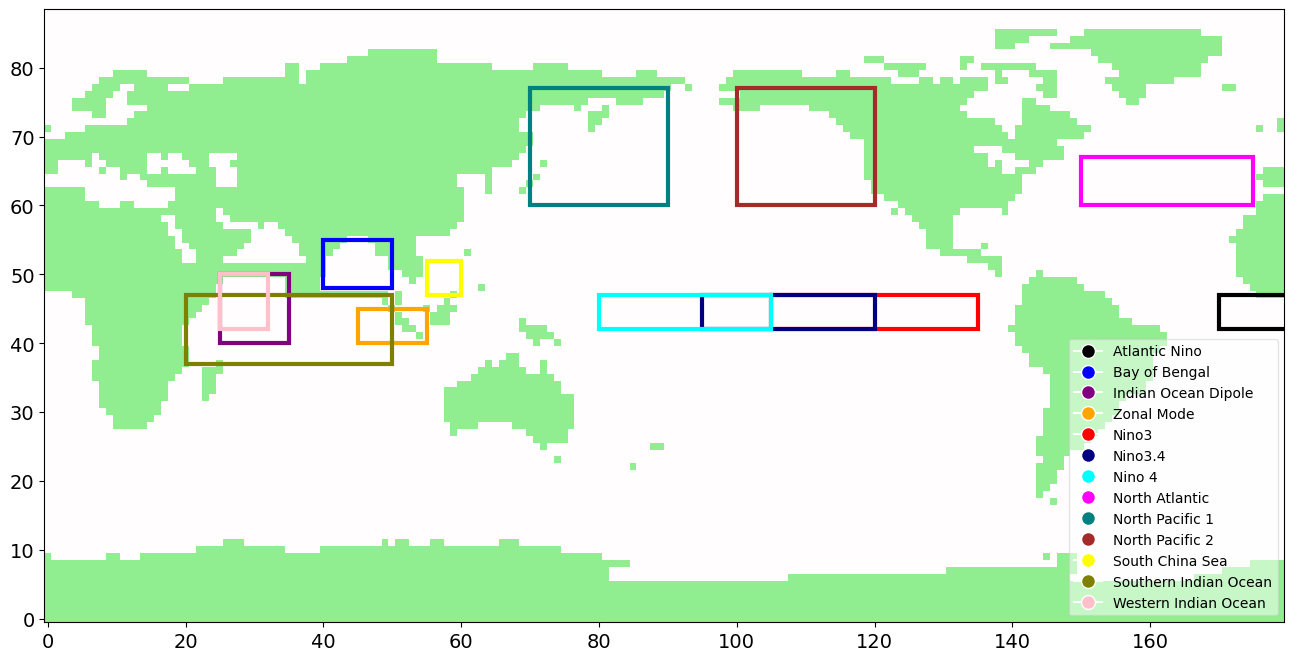

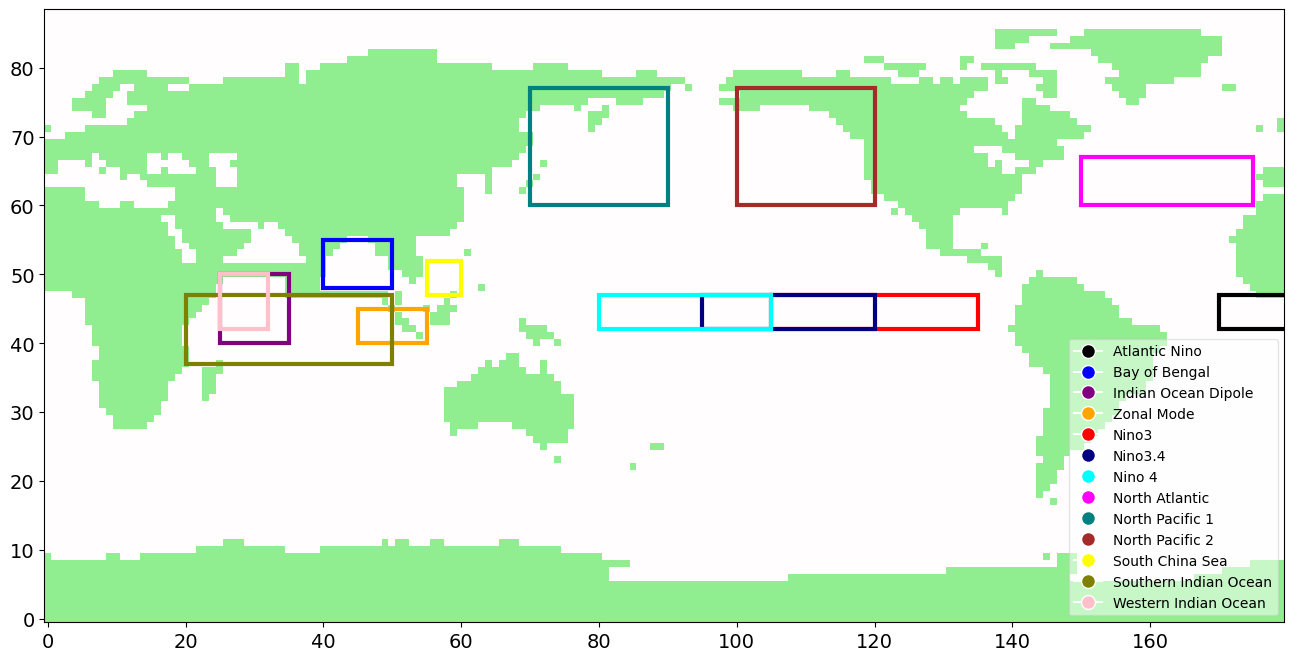

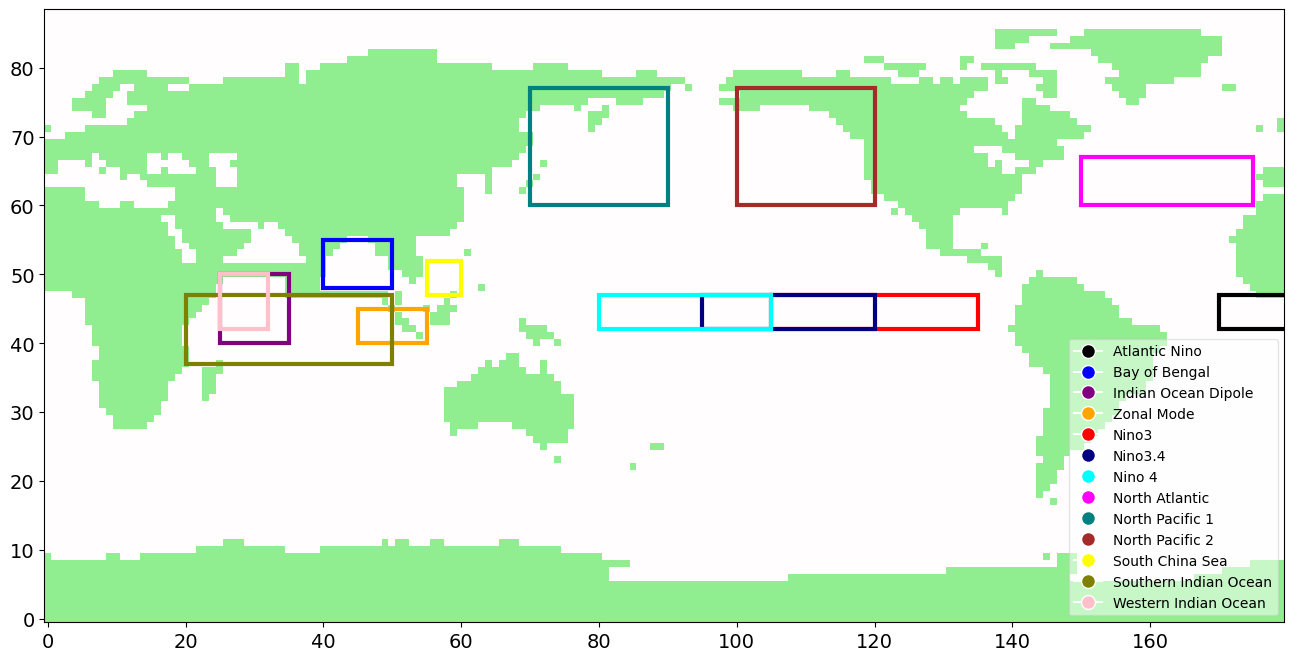

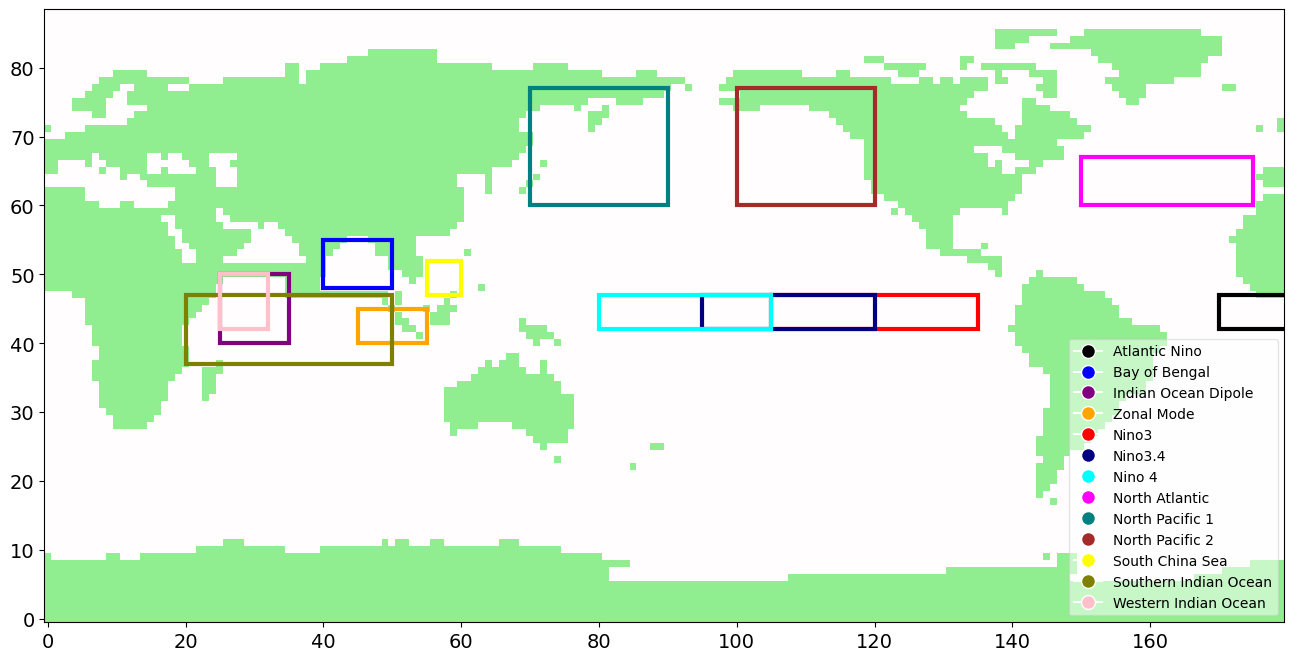

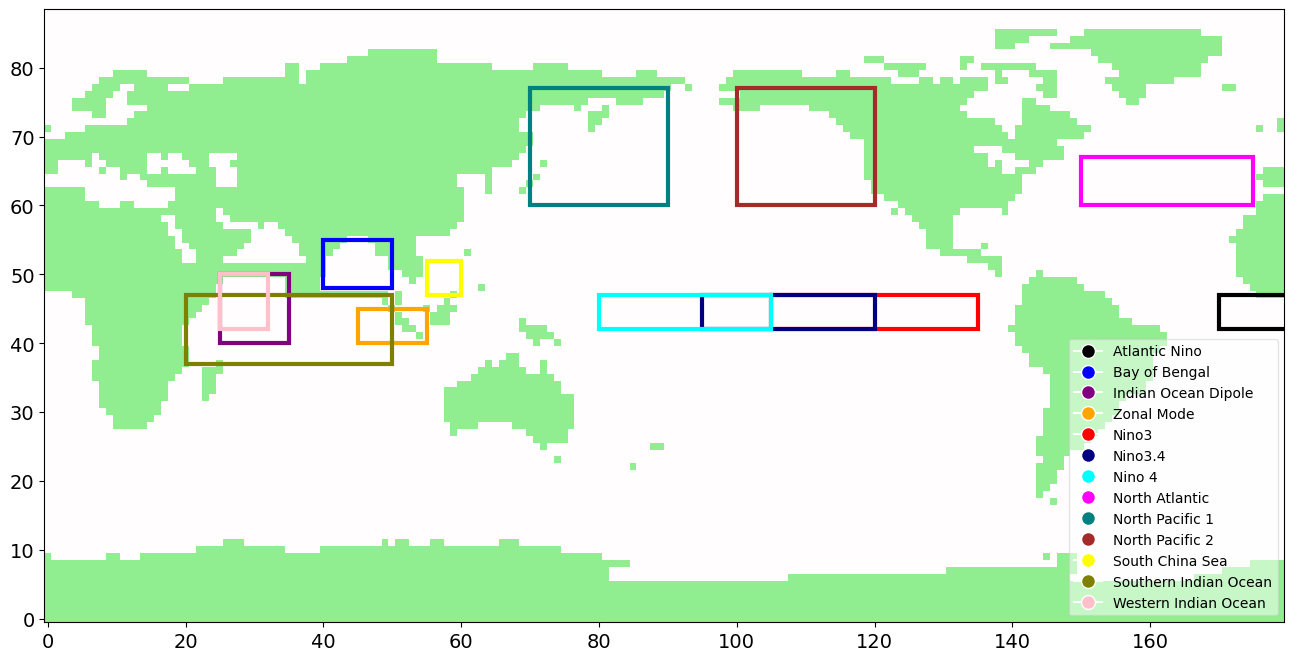

In [22]:
PlotSSTMap(sst_cluster1_fullMap.to_array()[0],cluster=1)
PlotSSTMap(sst_cluster2_fullMap.to_array()[0],cluster=2)
PlotSSTMap(sst_cluster3_fullMap.to_array()[0],cluster=3)
PlotSSTMap(sst_cluster4_fullMap.to_array()[0],cluster=4)
PlotSSTMap(sst_cluster5_fullMap.to_array()[0],cluster=5)
PlotSSTMap(sst_cluster6_fullMap.to_array()[0],cluster=6)
PlotSSTMap(sst_cluster7_fullMap.to_array()[0],cluster=7)
PlotSSTMap(sst_cluster8_fullMap.to_array()[0],cluster=8)


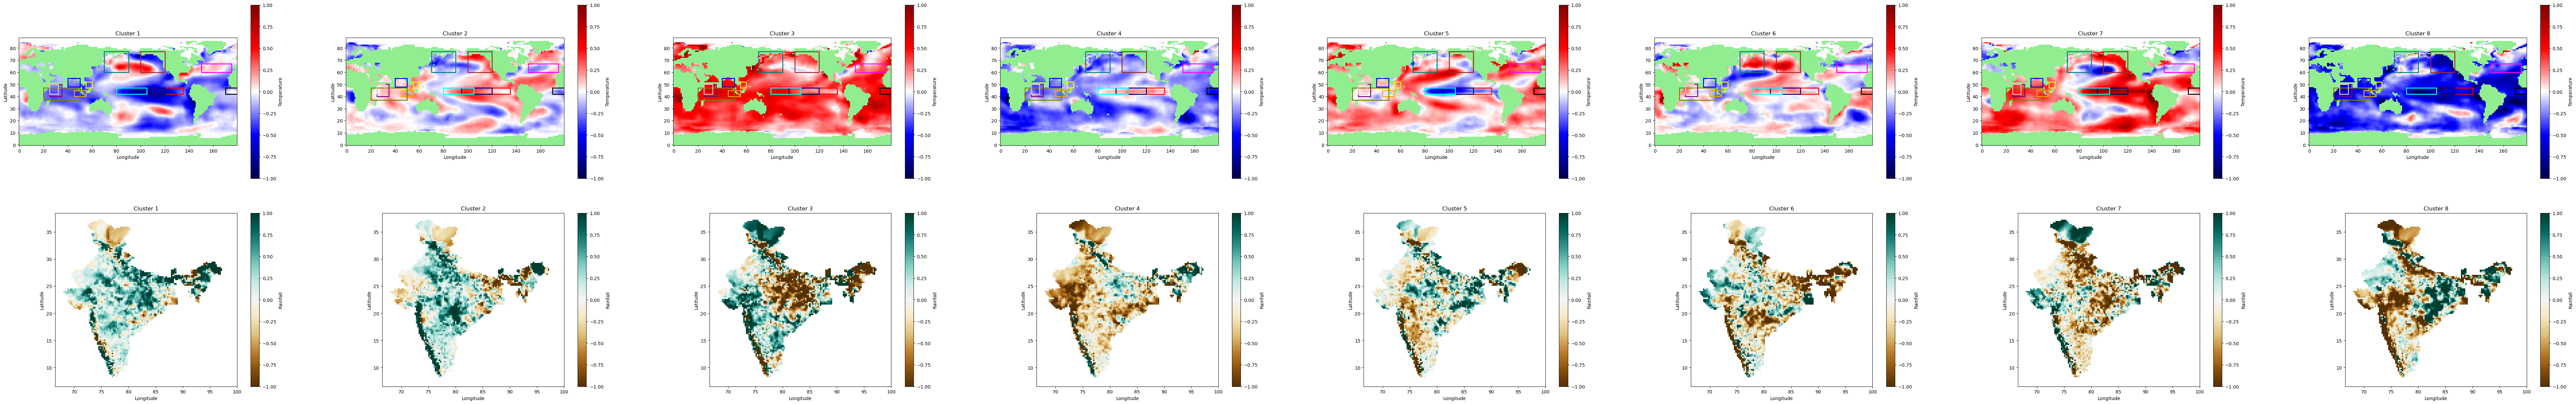

In [23]:
sst_arr=[sst_cluster1_fullMap,sst_cluster2_fullMap,sst_cluster3_fullMap,sst_cluster4_fullMap,
         sst_cluster5_fullMap,sst_cluster6_fullMap,sst_cluster7_fullMap,sst_cluster8_fullMap,
        ]

rainfall_arr=[rainfall_cluster1_fullMap,rainfall_cluster2_fullMap,rainfall_cluster3_fullMap,rainfall_cluster4_fullMap,
              rainfall_cluster5_fullMap,rainfall_cluster6_fullMap,rainfall_cluster7_fullMap,rainfall_cluster8_fullMap,
             ]

PlotAllMap(sst_arr,rainfall_arr)


In [24]:
#Accessing the zone files
region1=[]
region2=[]
region3=[]
region4=[]
region5=[]
region6=[]
region7=[]
region8=[]
region9=[]
region10=[]
region11=[]
region12=[]
region13=[]


#Accessing nc the datasets
path1=[]
path2=[]
path3=[]
path4=[]
path5=[]
path6=[]
path7=[]
path8=[]
path9=[]
path10=[]
path11=[]
path12=[]
path13=[]


#Storing the paths in a array
for i in range(1901,2011):
    path1.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 1\ssta_{i}.nc")
    path2.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 2\ssta_{i}.nc")
    path3.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 3\ssta_{i}.nc")
    path4.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 4\ssta_{i}.nc")
    path5.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 5\ssta_{i}.nc")
    path6.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 6\ssta_{i}.nc")
    path7.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 7\ssta_{i}.nc")
    path8.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 8\ssta_{i}.nc")
    path9.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 9\ssta_{i}.nc")
    path10.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 10\ssta_{i}.nc")
    path11.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 11\ssta_{i}.nc")
    path12.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 12\ssta_{i}.nc")
    path13.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 13\ssta_{i}.nc")

   
    
    
#Accessing all the datasets and storing all data in all_data list
for i in range(len(path1)):
    region1.append(xarray.open_dataset(path1[i]))
    region2.append(xarray.open_dataset(path2[i]))
    region3.append(xarray.open_dataset(path3[i]))
    region4.append(xarray.open_dataset(path4[i]))
    region5.append(xarray.open_dataset(path5[i]))
    region6.append(xarray.open_dataset(path6[i]))
    region7.append(xarray.open_dataset(path7[i]))
    region8.append(xarray.open_dataset(path8[i]))
    region9.append(xarray.open_dataset(path9[i]))
    region10.append(xarray.open_dataset(path10[i]))
    region11.append(xarray.open_dataset(path11[i]))
    region12.append(xarray.open_dataset(path12[i]))
    region13.append(xarray.open_dataset(path13[i]))


    

In [25]:
predict_category=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
predict_category

,region1,region2,region3,region4,region5,region6,region7,region8,region9,region10,region11,region12,region13
0,7,6,6,6,4,3,3,5,6,4,3,6,6
1,4,7,6,7,5,4,4,7,5,4,7,7,5
2,6,7,7,7,4,4,4,6,4,5,7,7,7
3,6,7,7,7,5,5,6,6,5,6,7,7,7
4,7,7,7,7,6,6,7,7,6,7,6,7,7
5,6,7,7,7,6,7,7,7,5,6,7,7,7
6,7,7,7,6,6,6,6,7,6,5,4,7,7
7,6,7,7,7,4,4,6,7,7,6,7,6,7
8,7,7,7,7,6,6,6,7,6,6,6,7,7
9,7,7,7,7,6,6,6,7,6,6,7,7,7


In [26]:
predicted=km.predict(predict_category)

In [27]:
predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
yr=2011
indx=110
for i in range(len(predicted)):
    years_Cluster[predicted[i]].append(indx)
    years_Cluster_not_indexs[predicted[i]].append(yr)
    indx+=1
    yr+=1


In [38]:
years_Cluster_not_indexs

{0: [1907,
  1916,
  1921,
  1925,
  1927,
  1933,
  1934,
  1935,
  1938,
  1943,
  1949,
  1950,
  1955,
  1956,
  1968,
  1971,
  1974,
  1975,
  1976],
 1: [1915,
  1919,
  1931,
  1940,
  1942,
  1946,
  1953,
  1957,
  1958,
  1959,
  1960,
  1964,
  1966,
  1977,
  1978,
  1981],
 2: [1973,
  1988,
  1990,
  1991,
  1995,
  1996,
  1998,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022],
 3: [1901,
  1902,
  1903,
  1905,
  1906,
  1912,
  1914,
  1922,
  1923,
  1924,
  1928,
  1930,
  1932,
  1936,
  1939,
  1948,
  1951,
  1965],
 4: [1937, 1945, 1952, 1954, 1961, 1984, 1985, 1989, 1999, 2000, 2008],
 5: [1920, 1926, 1944, 1947, 1962, 1963, 1967, 1972, 1986],
 6: [1941, 1969, 1970, 1979, 1980, 1982, 1983, 1987, 1992, 1993, 1994, 1997],
 7: [1904, 1908, 1909, 1910, 1911, 1913, 1917, 1918, 1929]}

In [39]:
for i in years_Cluster_not_indexs.values():
    print(len(i))

19
16
28
18
11
9
12
9


In [40]:
df = pd.DataFrame(predicted, columns=(['Cluster Number']))
df.to_csv('SSTA 8 Cluster Number 2011-2022.csv')
df

,Cluster Number
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2
